# Make a plot of the air drag on a VW Golf

In [1]:
# this is a comment.
# I need to include these commands to make plots
import matplotlib.pyplot as plt
%matplotlib inline

# this allows me to do some vector math
import numpy as np

In [2]:
# these are constants for the simualtion
Cd=0.32
A=1.759*2.60 # m^2
rho_air=1.225 #kg/m^3

In [3]:
# create an array of speeds
v=np.arange(0,50,1) # a list of speeds in m/s

The air resistance force we're using takes the form of $F_{air}=\frac{1}{2} C_D \rho A v^2$

In [4]:
# create a list of forces (from air resistance)
f_air=0.5*Cd*rho_air*A*(v**2)
display(f_air)

array([0.00000000e+00, 8.96386400e-01, 3.58554560e+00, 8.06747760e+00,
       1.43421824e+01, 2.24096600e+01, 3.22699104e+01, 4.39229336e+01,
       5.73687296e+01, 7.26072984e+01, 8.96386400e+01, 1.08462754e+02,
       1.29079642e+02, 1.51489302e+02, 1.75691734e+02, 2.01686940e+02,
       2.29474918e+02, 2.59055670e+02, 2.90429194e+02, 3.23595490e+02,
       3.58554560e+02, 3.95306402e+02, 4.33851018e+02, 4.74188406e+02,
       5.16318566e+02, 5.60241500e+02, 6.05957206e+02, 6.53465686e+02,
       7.02766938e+02, 7.53860962e+02, 8.06747760e+02, 8.61427330e+02,
       9.17899674e+02, 9.76164790e+02, 1.03622268e+03, 1.09807334e+03,
       1.16171677e+03, 1.22715298e+03, 1.29438196e+03, 1.36340371e+03,
       1.43421824e+03, 1.50682554e+03, 1.58122561e+03, 1.65741845e+03,
       1.73540407e+03, 1.81518246e+03, 1.89675362e+03, 1.98011756e+03,
       2.06527427e+03, 2.15222375e+03])

Text(0.5, 1.0, 'Air Drag on a 2006 VW GTI')

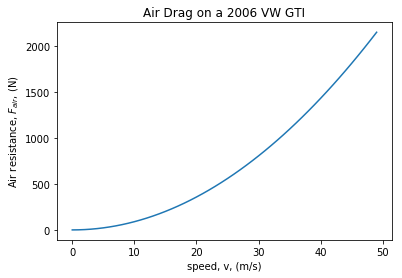

In [5]:
# now, make a plot
plt.plot(v,f_air)
plt.xlabel("speed, v, (m/s)")
plt.ylabel("Air resistance, $F_{air}$, (N)")
plt.title("Air Drag on a 2006 VW GTI")

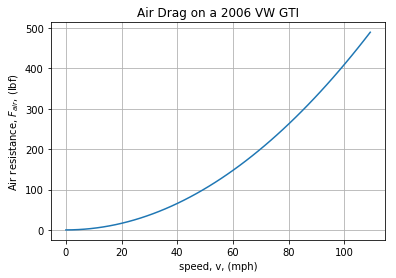

In [6]:
# let's convert the plot to be in US units
lbs_per_N=(1.0/4.4)
mph_per_mps=(6.2/10000.0)*(3600/1.0)
plt.plot(v*mph_per_mps,f_air*lbs_per_N)
plt.xlabel("speed, v, (mph)")
plt.ylabel("Air resistance, $F_{air}$, (lbf)")
plt.title("Air Drag on a 2006 VW GTI")
plt.grid()

# Simulate the motion of a VW Golf doing a "Toonces" off Garvin Heights overlook

In [ ]:
# there are all kinds of youtube videos. Eg, 
from IPython.display import YouTubeVideo
# A sketch on Saturday Night Live
# https://www.youtube.com/watch?v=5fvsItXYgzk
YouTubeVideo('5fvsItXYgzk')

We'll need a few pieces to simulate this motion.  
1. "Up" is y, "out" is x, out of the board is z
2. Initial velocity $\vec{v_0}=\langle v_0,0,0 \rangle$
3. $\vec{F}=m\vec{a}$.  
3. $\vec{F_{air}} = - b v^2 \hat{v}$ where $b= \frac{1}{2} C_D \rho A$

So, if the car was just dropped from a crane, 
$\vec{F}=\langle 0,-mg -bv^2~\frac{\vec{v}}{|v|}, 0 \rangle $

How do you simulate this? Step by step (Riemann-sum style) with the approximation that force doesn't change during a step.  Ie
$\Delta y = v \Delta t+ \frac{1}{2}a (\Delta t)^2$ and $\Delta v = a \Delta t$ and $a=F/m$.

In [7]:
# Setup section

# timestep
dt=0.001 # sec
t=0
# initial velocity
v=0.0 # m/s
# initial position
y=200.0 # m
# force parameters
m = 1360.0 # kg
g = 9.8 # N/kg
b = 0.5*Cd*rho_air*A

# we'll store simulation parameters in a list
# initial values
tvals=[t]
yvals=[y]
vvals=[v]
Fvals=[-m*g]


# Simulation
# simulate the drop
for i in range(6000):
    if (abs(v)>0) :
        F=-m*g - b*v*v*(v/abs(v))
    else :
        F=-m*g
    a=F/m
    dv=a*dt
    dy=v*dt+0.5*a*dt**2
    
    t=t+dt
    v=v+dv
    y=y+dy
 
    tvals.append(t)
    yvals.append(y)
    vvals.append(v)
    Fvals.append(F)

Text(0.5, 0, 'time, t, (sec)')

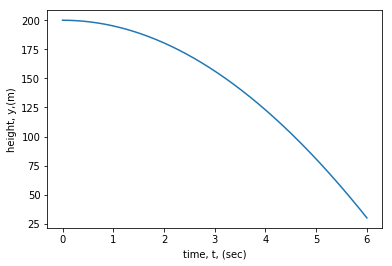

In [8]:
plt.plot(tvals,yvals)
plt.ylabel("height, y,(m)")
plt.xlabel("time, t, (sec)")

Text(0.5, 0, 'time, t, (s)')

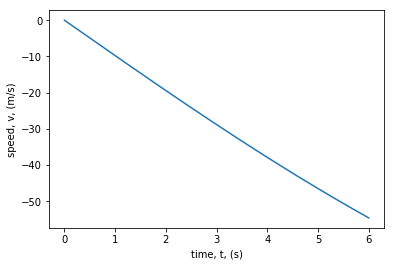

In [9]:
plt.plot(tvals,vvals)
plt.ylabel("speed, v, (m/s)")
plt.xlabel("time, t, (s)")

Text(0.5, 1.0, "Toonce's drops a car from a crane")

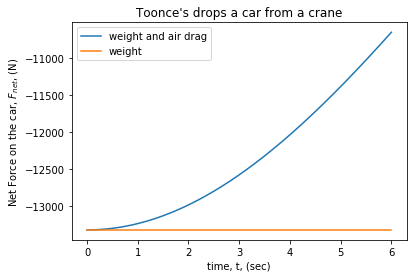

In [10]:
plt.plot(tvals,Fvals,label="weight and air drag")
plt.plot([min(tvals),max(tvals)],[-m*g,-m*g],label="weight")
plt.legend()
plt.xlabel("time, t, (sec)")
plt.ylabel("Net Force on the car, $F_{net}$, (N)")
plt.title("Toonce's drops a car from a crane")

# Now the 2d case.  

In [11]:
# Setup section

# timestep
dt=0.001 # sec
t=0
# initial velocity
vx=15.0 # m/s
vy=0.0 # m/s
# initial position
y=200.0 # m
x=0.0 # m
# force parameters
m = 1360.0 # kg
g = 9.8 # N/kg
b = 0.5*Cd*rho_air*A

# we'll store simulation parameters in a list
# initial values
t_vals=[t]
y_vals=[y]
x_vals=[x]
vx_vals=[vx]
vy_vals=[vy]
Fy_vals=[-m*g]
Fx_vals=[0]


# simulate the drop
for i in range(100000):
    
    v_mag = (vx*vx + vy*vy)**0.5
    F_air_mag = b*v_mag**2
    vx_hat = vx/v_mag
    vy_hat = vy/v_mag
    
    if (v_mag>0) :
        Fx = -F_air_mag*vx_hat 
        Fy = -m*g - F_air_mag*vy_hat
    else :
        Fx=0
        Fy=-m*g
    
    ax=Fx/m
    ay=Fy/m
    
    dvx=ax*dt
    dvy=ay*dt
    
    dy = vy*dt + 0.5*ay*dt**2
    dx = vx*dt + 0.5*ax*dt**2
    
    t=t+dt
    
    vx = vx+dvx
    vy = vy + dvy
    
    y = y + dy
    x = x + dx
 
    t_vals.append(t)
    y_vals.append(y)
    x_vals.append(x)
    vx_vals.append(vx)
    vy_vals.append(vy)
    Fx_vals.append(Fx)
    Fy_vals.append(Fy)

Text(0.5, 0, 'range, x (m)')

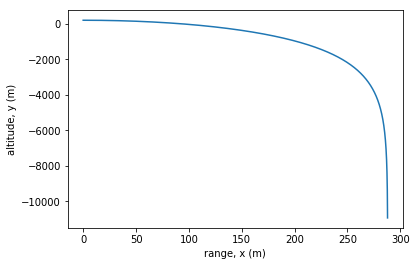

In [12]:
plt.plot(x_vals,y_vals)
plt.ylabel("altitude, y (m)")
plt.xlabel("range, x (m)")

Text(0.5, 0, 'time, t (s)')

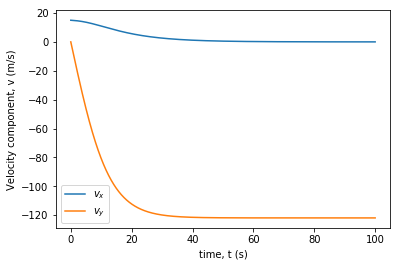

In [13]:
plt.plot(t_vals,vx_vals,label="$v_x$")
plt.plot(t_vals,vy_vals,label="$v_y$")
plt.legend()
plt.ylabel("Velocity component, v (m/s)")
plt.xlabel("time, t (s)")

Text(0.5, 0, 'time, t (s)')

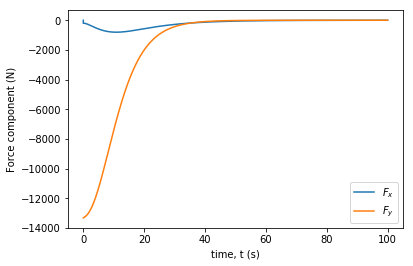

In [14]:
plt.plot(t_vals,Fx_vals,label="$F_x$")
plt.plot(t_vals,Fy_vals,label="$F_y$")
plt.legend()
plt.ylabel("Force component (N)")
plt.xlabel("time, t (s)")